<div id="toc"></div>

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')



<IPython.core.display.Javascript object>

# Goal: Keep plotting tools handy
Patricia Schuster, UM, Jan 2017

I'm going to keep a few convenient plotting functions on here for my own reference. Extensive documentation for pyplot is here: <http://matplotlib.org/api/pyplot_api.html>

# Import Modules
I generally require the following modules:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np


# Customize line and marker style
Make it beautiful

Marker styles: <http://matplotlib.org/api/markers_api.html#module-matplotlib.markers>
- ”.”    point
- ”,”    pixel
- “o”    circle
- “v”    triangle_down
- “^”    triangle_up
- “<”    triangle_left
- “>”    triangle_right
- “1”    tri_down
- “2”    tri_up
- “3”    tri_left
- “4”    tri_right
- “8”    octagon
- “s”    square
- “p”    pentagon
- “*”    star
- “h”    hexagon1
- “H”    hexagon2
- “+”    plus
- “x”    x
- “D”    diamond
- “d”    thin_diamond

Line styles: <http://matplotlib.org/api/lines_api.html>
- '-' or 'solid'     solid line
- '--' or 'dashed'   dashed line
- '-.' or 'dashdot'  dash-dotted line
- ':' or 'dotted'    dotted line
- 'None'             draw nothing
- ' '                draw nothing
- ''                 draw nothing

Colors: <http://matplotlib.org/api/colors_api.html>
- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white
- HTML color picker: <http://www.w3schools.com/colors/colors_picker.asp>

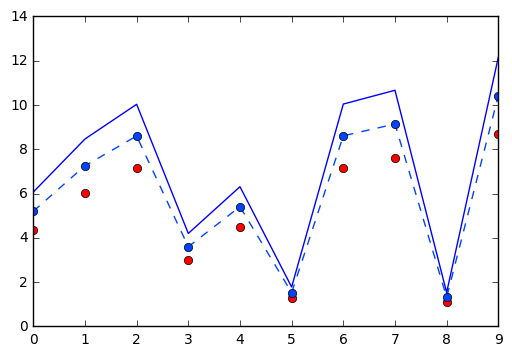

In [2]:
N = 10;
y = 10*np.random.rand(N)

plt.plot(y,'or')
plt.plot(y*1.2,'--o',color ='#0044ff')
plt.plot(y*1.4,)
plt.show()

# Modify axes range, scale
Set limits for x- and y-axes, change scale to log or linear

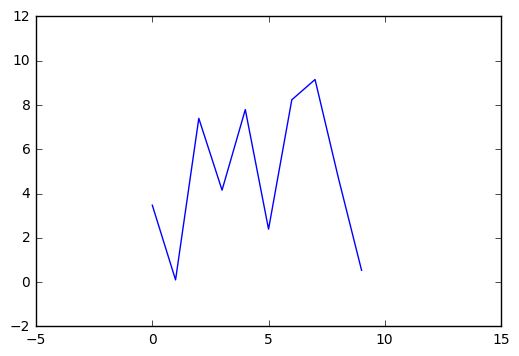

In [149]:
# Generate random data
N = 10;
y = 10*np.random.rand(N)

# Modify x- and y-axes ranges
plt.plot(y)
plt.xlim([-5,15])
plt.ylim([-2,12])
plt.show()

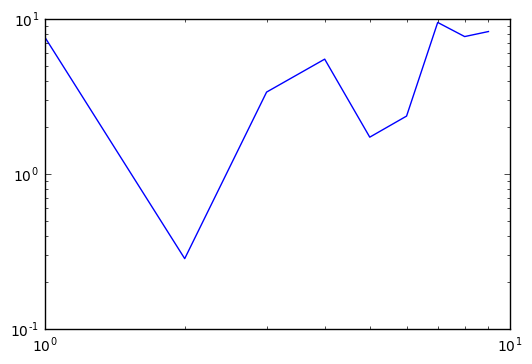

In [148]:
# Modify x- and y-scales for log-scale view
plt.plot(y)
plt.yscale('log')
plt.xscale('log')
plt.show()

# Labels, titles, etc. 

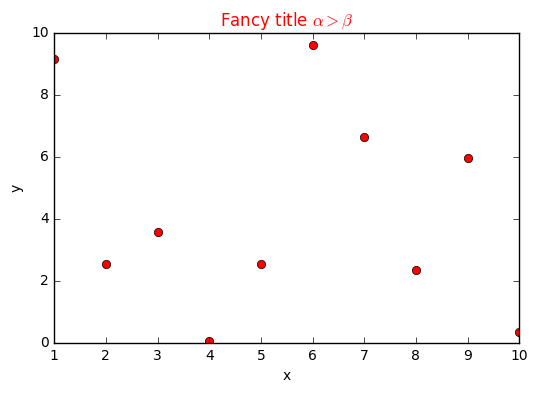

In [143]:
N = 10;
x = np.arange(0,N)
y = 10*np.random.rand(N)

plt.plot(x+1,y,'or')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Fancy title $\alpha > \beta$',color='r') # Include the 'r' at the beginning of the title for Latex style
plt.show()


# Multiple plots on same axes

## Two curves on same plot with legend
How do I hold the plot so that I can put multiple plots on the same axes? In MATLAB I would call `hold on` and `hold off`, but it seems that in Python I just need to run multiple `plt.plot()` commands and then call `plt.show()` to display all at once. In order to clear the plots, use `plt.cla()`.

In [43]:
# Generate random data on two different scales
N = 10;
x = np.arange(1,N+1)
y1 = 10*np.random.rand(N)
y2 =    np.random.rand(N)

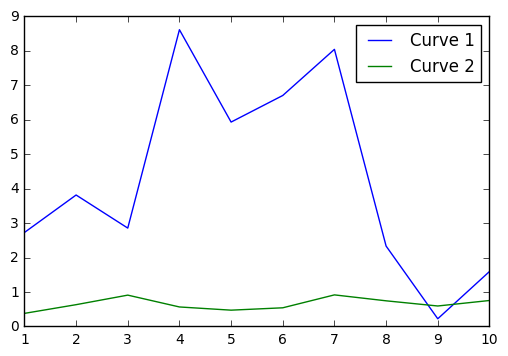

In [81]:
# Make a simple plot with both data displayed
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(['Curve 1','Curve 2'])
plt.show()

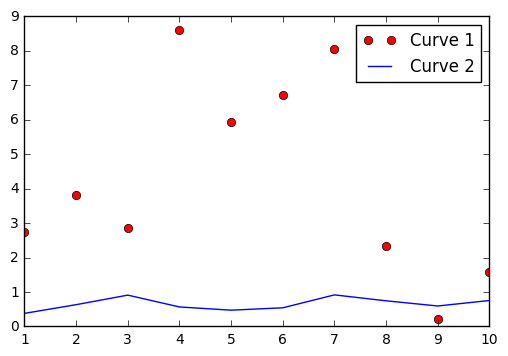

In [82]:
# Try another strategy
plt.plot(x,y1,'ro',x,y2)
plt.legend(['Curve 1','Curve 2'])
plt.show()

## Different y-axes

Same x-axis, different y-axes for plotting two curves on different scales.

In [87]:
# Generate random data on two different scales
N = 100;
x = np.arange(1,N+1)
y1 = 10*np.random.rand(N)
y2 =    np.random.rand(N)

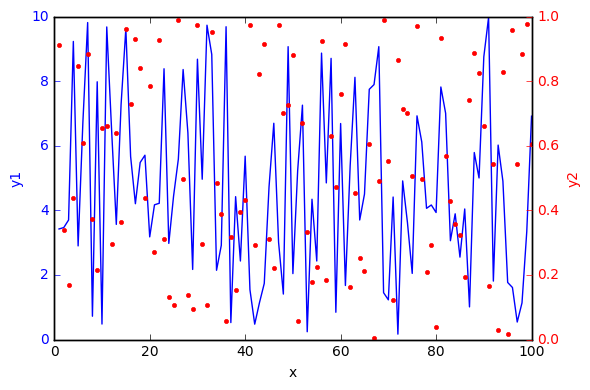

In [88]:
fig, ax1 = plt.subplots()
ax1.plot(x, y1, 'b-')
ax1.set_xlabel('x')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('y1', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r.')
ax2.set_ylabel('y2', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

## Subplots

The remaining problem is that the xlabel only exists on the first plot. So this only works when the x-variable is the same for both plots. How do I change that so that I can put a unique xlabel on the first subplot?

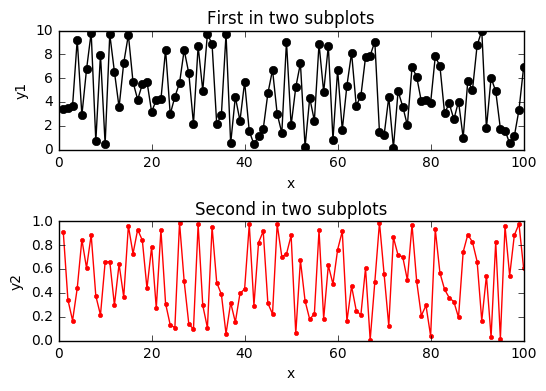

In [122]:
# Syntax: subplot(nrows, ncols, plot_number)
plt.subplot(2, 1, 1)
plt.plot(x, y1, 'ko-')
plt.xlabel('x')
plt.ylabel('y1')
plt.title('First in two subplots')

plt.subplot(2, 1, 2)
plt.plot(x, y2, 'r.-')
plt.xlabel('x')
plt.ylabel('y2')
plt.title('Second in two subplots')

plt.subplots_adjust(wspace=0.4,hspace=0.6) # wspace only affects multi-column subplots
plt.show()


# Histogram

## 1D Histogram

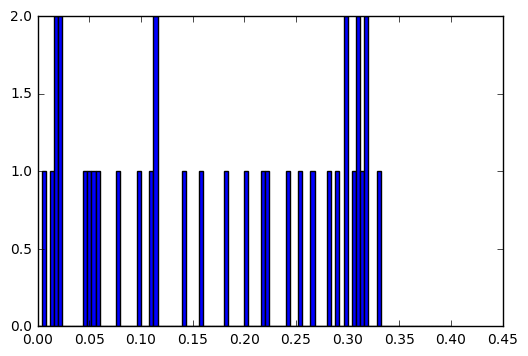

In [158]:
N = 100;
y = np.random.rand(N)

plt.hist(y,bins=100,range=[0,0.4])
plt.show()

[  6.   5.   4.   2.   1.   3.   3.  10.   1.   0.]
[ 0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4 ]
10
11


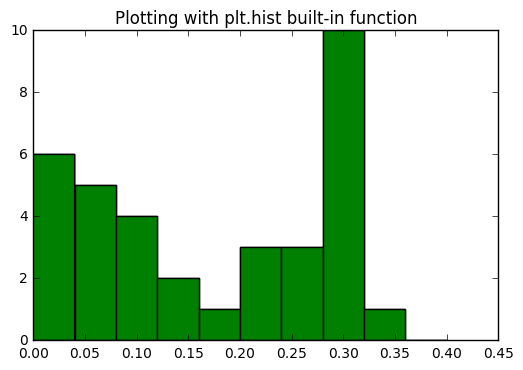

[ 0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36]
[ 0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4 ]


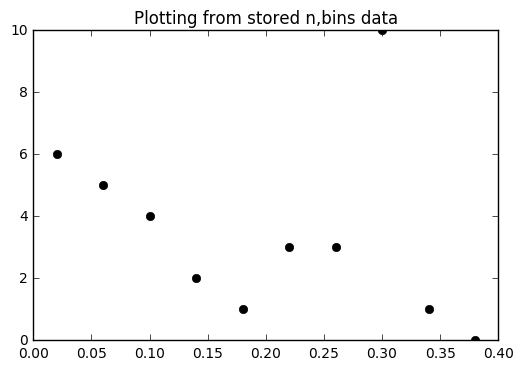

In [199]:
# Store the histogram data
(n, bins, patches) = plt.hist(y,bins=10,range=[0,0.4])

# bins contains the edges of the bins, not the midpoints. Thus, there is one more element in bins than in n.
print(n)
print(bins)

print(len(n))
print(len(bins))

# If I only want to store the first two values?
(n,bins) = plt.hist(y,bins=10,range=[0,0.4])[0:2]
plt.title('Plotting with plt.hist built-in function')
plt.show()

# How do I plot n, bins after storing them without calling plt.hist() again? Need to plot vs. bin centers
plt.cla()
plt.plot(.5*(bins[:-1]+bins[1:]),n,'ok')
plt.title('Plotting from stored n,bins data')
plt.show()

## 2D Histogram

Try out the `hexbin` function.

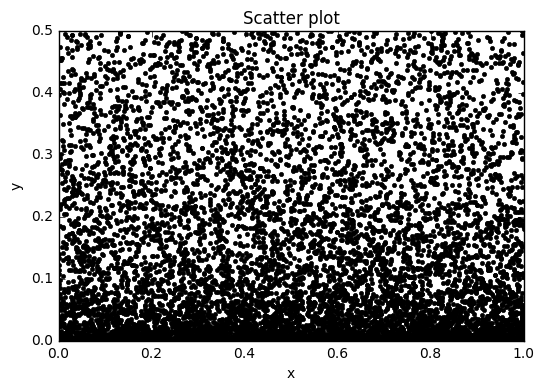

In [33]:
N = 10000;
x = np.random.rand(N)
y = np.random.rand(N)
y = y**3
y = y/2

plt.plot(x,y,'.k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot')
plt.show()


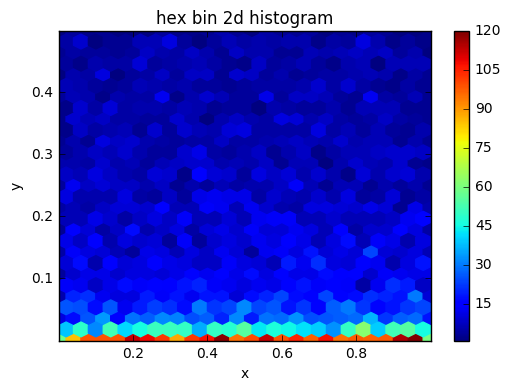

In [34]:
plt.hexbin(x,y,gridsize = 25,mincnt=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('hex bin 2d histogram')
plt.colorbar()
plt.show()

# I'm not totally sold on this... investigate other options
# It is nice, though, that you can easily make the colorbar log scale
# It's also nice that you can set a minimum count number so that empty bins are white


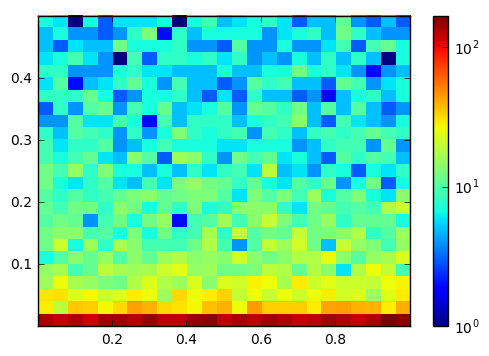

In [35]:
# Make a square-bin 2d histogram with log-scale colorbar
plt.hist2d(x,y,bins=25,norm=matplotlib.colors.LogNorm())
plt.colorbar()
#plt.xlabel('x')
#plt.ylabel('y')
#plt.title('2d histogram with square bins')
plt.show()

# Adding the xlabel messes up placement of the bins somehow...

Store the `counts` data and plot after the fact? Use `meshgrid` and `pcolormesh`.

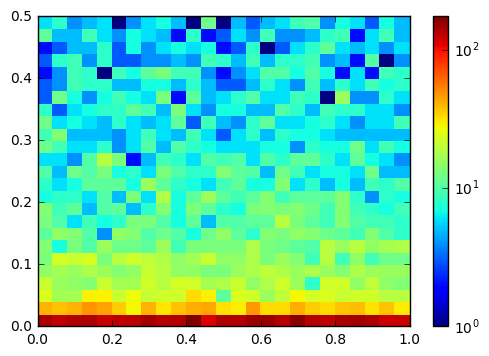

In [16]:
N = 10000;
x = np.random.rand(N)
y = np.random.rand(N)
y = y**3
y = y/2

# Save counts to a variable- use numpy instead of plt.hist2d so as not to create a plt object
# Note that x- and y-axes are flipped
counts, y_edges, x_edges = np.histogram2d(y, x, bins=25)

X,Y = np.meshgrid(x_edges,y_edges)
plt.pcolormesh(X, Y, counts, norm=matplotlib.colors.LogNorm()) # pcolormesh faster than pcolor
plt.colorbar()
plt.show()
# Note: Empty bins show up as white


# Save to file
The command is `plt.savefig('figname.png')`

In [256]:
plt.plot([1,2,3,4,5],[2,4,6,8,10],'ok')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Just a plot')
plt.savefig('simple_plot.png')

# You can call plt.show() after plt.savefig(), but not the other way around or else you will save an empty plot


# Other ideas

Aaron Bevill says I can use a matplotlib rc file to set default plotting settings.

I need to figure out how to animate plots.